In [1]:
from sklearn import tree,metrics
from sklearn.model_selection import train_test_split
import pandas as pd
reviews=pd.read_csv('winequality-red.csv')
reviews.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
reviews.shape

(1599, 12)

In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
reviews.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
reviews=reviews.dropna(axis=1)

In [11]:
reviews.shape

(1599, 12)

In [12]:
reviews['quality'].values

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [13]:
reviews['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [14]:
reviews['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

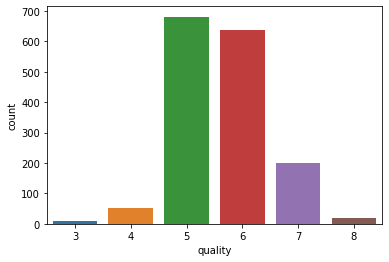

In [16]:
import seaborn as sns
sns.countplot(reviews['quality'],label='count')

In [17]:
reviews.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [23]:
reviews.iloc[:,:12]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


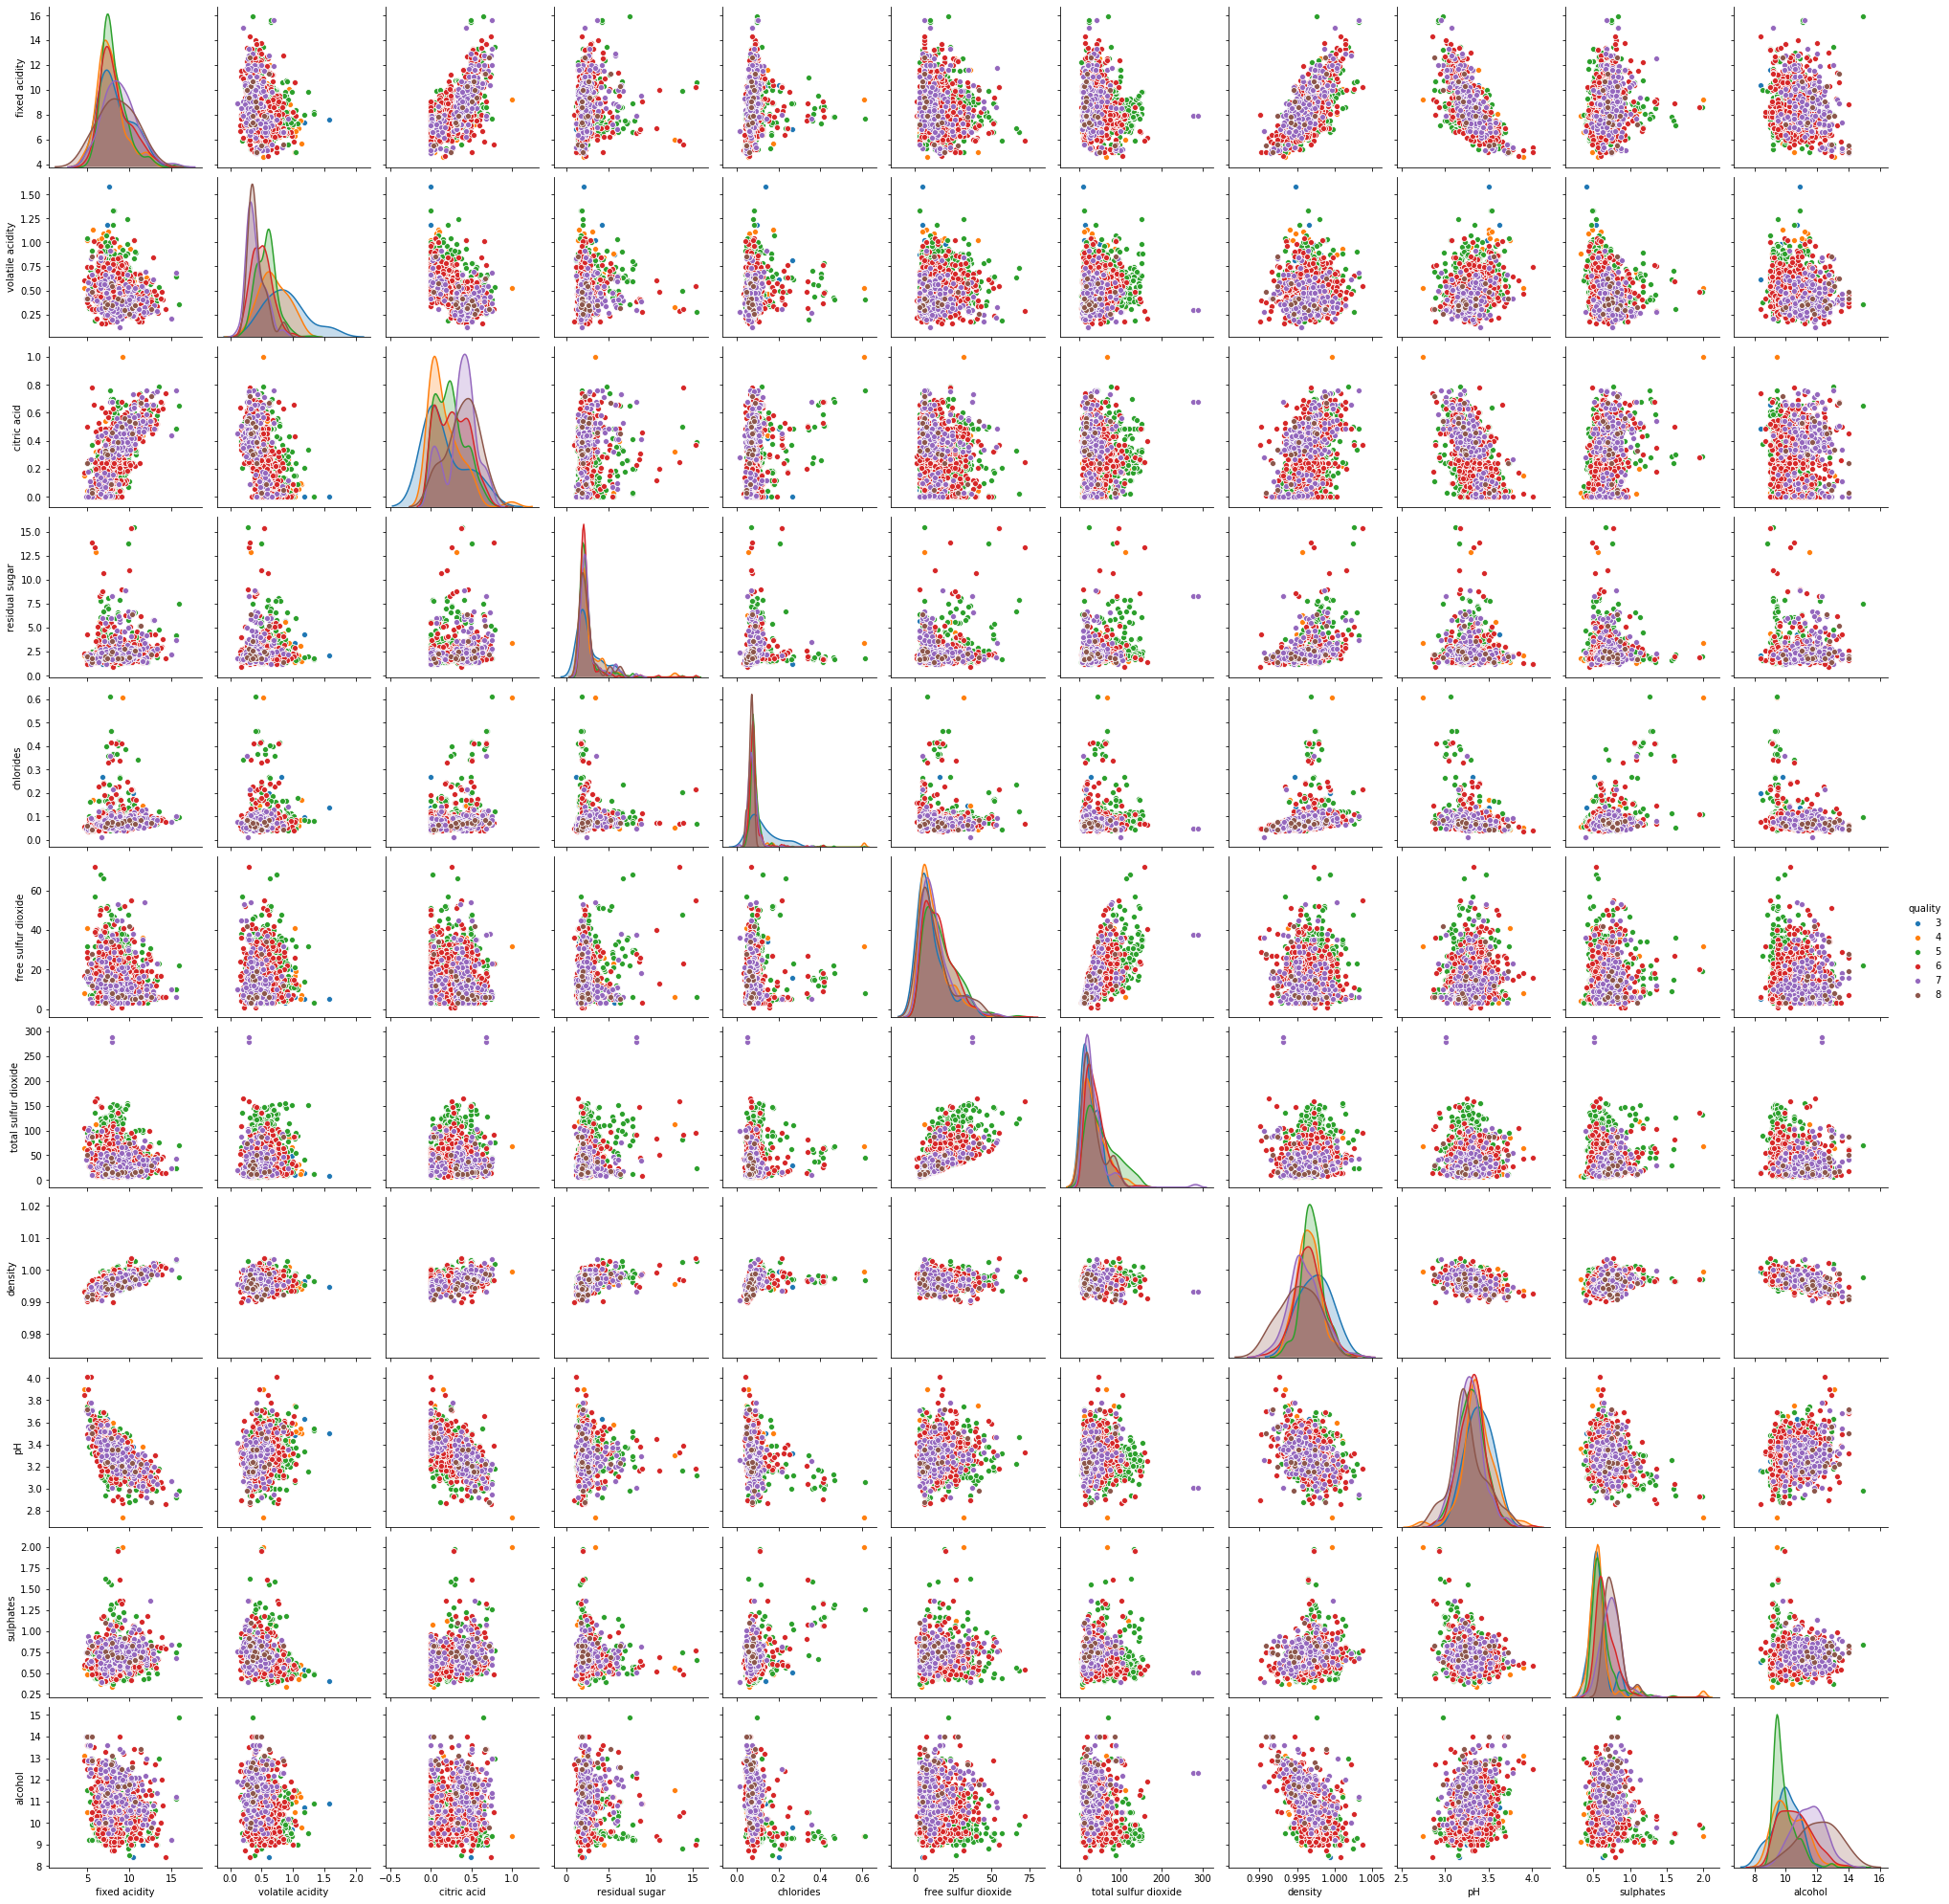

In [24]:
sns.pairplot(reviews.iloc[:,:12],hue='quality')

In [26]:
reviews.iloc[:,:11].corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


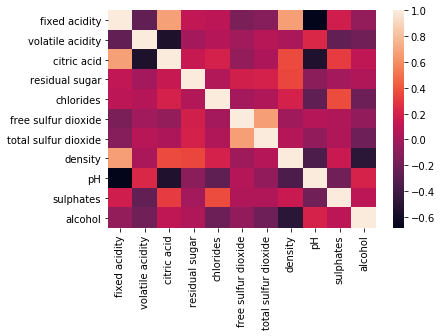

In [28]:
sns.heatmap(reviews.iloc[:,:11].corr())

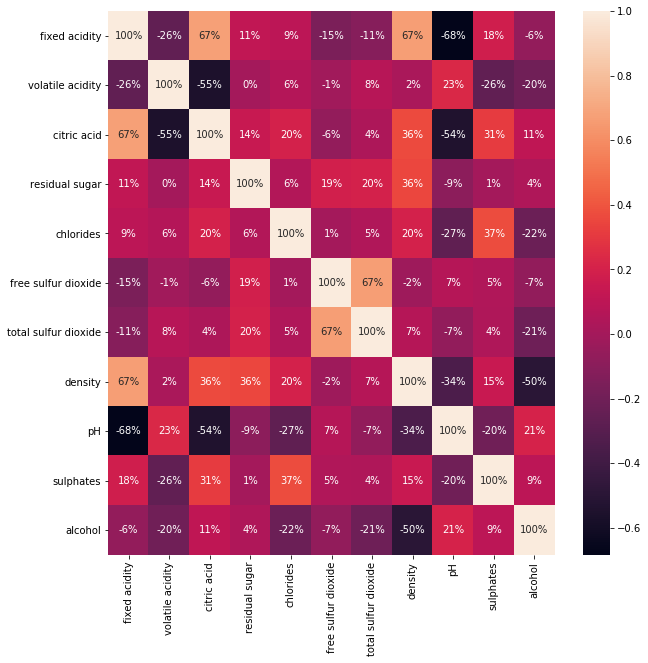

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(reviews.iloc[:,:11].corr(),annot=True,fmt='.0%')

In [37]:
x=reviews.iloc[:,:11].values
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [39]:
y=reviews.iloc[:,-1].values
y

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [41]:
x_train

array([[ 9.9 ,  0.54,  0.45, ...,  3.39,  0.62,  9.4 ],
       [10.8 ,  0.26,  0.45, ...,  3.13,  0.54,  9.6 ],
       [ 9.9 ,  0.35,  0.55, ...,  3.26,  0.79, 10.6 ],
       ...,
       [ 7.9 ,  0.57,  0.31, ...,  3.29,  0.69,  9.5 ],
       [13.  ,  0.47,  0.49, ...,  3.3 ,  0.68, 12.7 ],
       [ 9.8 ,  0.98,  0.32, ...,  3.25,  0.48,  9.4 ]])

In [42]:
x_test

array([[10.8  ,  0.47 ,  0.43 , ...,  3.17 ,  0.76 , 10.8  ],
       [ 8.1  ,  0.82 ,  0.   , ...,  3.36 ,  0.53 ,  9.6  ],
       [ 9.1  ,  0.29 ,  0.33 , ...,  3.26 ,  0.84 , 11.7  ],
       ...,
       [ 9.1  ,  0.34 ,  0.42 , ...,  3.18 ,  0.55 , 11.4  ],
       [ 9.1  ,  0.765,  0.04 , ...,  3.29 ,  0.54 ,  9.7  ],
       [ 8.2  ,  0.32 ,  0.42 , ...,  3.27 ,  0.55 , 12.3  ]])

In [43]:
y_train

array([5, 5, 5, ..., 6, 6, 5], dtype=int64)

In [44]:
y_test

array([6, 5, 7, 6, 5, 6, 5, 6, 4, 5, 5, 5, 6, 5, 6, 6, 7, 5, 5, 4, 7, 6,
       6, 4, 6, 5, 5, 7, 5, 6, 5, 6, 5, 6, 7, 7, 5, 6, 6, 7, 5, 7, 6, 6,
       5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 6, 4, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 4, 5, 7, 6, 6, 5, 6, 5, 8, 6, 6, 6, 5, 5, 5, 5, 7, 5,
       6, 5, 7, 5, 6, 6, 6, 7, 6, 6, 5, 7, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6,
       6, 6, 6, 5, 6, 5, 8, 5, 6, 5, 6, 5, 4, 6, 7, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 8, 5, 6,
       6, 7, 7, 5, 5, 7, 5, 6, 6, 4, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 7, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 3, 6, 5, 5, 7, 6, 7, 6, 6, 7, 7, 6, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 7, 5, 6, 5, 6,
       5, 4, 5, 5, 6, 7, 6, 5, 5, 4, 5, 6, 7, 6, 6, 7, 5, 7, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6,

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_test

array([[ 1.44653617, -0.29922497,  0.8557103 , ..., -0.93785052,
         0.72205872,  0.31519731],
       [-0.08433993,  1.83333604, -1.39006001, ...,  0.28055357,
        -0.85116573, -0.79369656],
       [ 0.48265122, -1.39597062,  0.33343814, ..., -0.36071174,
         1.26926723,  1.14686771],
       ...,
       [ 0.48265122, -1.09131905,  0.80348308, ..., -0.87372399,
        -0.7143636 ,  0.86964424],
       [ 0.48265122,  1.49821931, -1.18115114, ..., -0.16833214,
        -0.78276467, -0.70128874],
       [-0.02764082, -1.21317968,  0.80348308, ..., -0.29658521,
        -0.7143636 ,  1.70131464]])

In [47]:
x_train

array([[ 0.90103398,  0.05480282,  0.9094138 , ...,  0.52091013,
        -0.22358408, -0.95579434],
       [ 1.41998736, -1.47967601,  0.9094138 , ..., -1.16841553,
        -0.68130963, -0.76727388],
       [ 0.90103398, -0.98645067,  1.4208416 , ..., -0.3237527 ,
         0.74908272,  0.17532846],
       ...,
       [-0.25219574,  0.21921126,  0.19341488, ..., -0.12883051,
         0.17692578, -0.86153411],
       [ 2.68854005, -0.32881689,  1.11398492, ..., -0.06385645,
         0.11971008,  2.15479335],
       [ 0.84337249,  2.46612668,  0.24455766, ..., -0.38872677,
        -1.0246038 , -0.95579434]])

In [48]:
dtree=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
y_pred=dtree.predict(x_test)
y_pred

array([6, 5, 7, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 7, 5, 6, 5, 7, 6,
       5, 6, 6, 5, 5, 7, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 6, 7, 7,
       6, 5, 5, 6, 6, 6, 5, 5, 6, 7, 6, 5, 5, 6, 7, 6, 6, 6, 6, 6, 5, 6,
       5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5,
       6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 7, 6, 6, 6, 6, 5, 6, 6, 6, 6,
       6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 7, 6, 5, 5, 6, 6, 5, 6,
       6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 7, 6, 6,
       6, 7, 6, 5, 5, 7, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6,
       6, 5, 5, 6, 5, 6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 7, 5, 6, 6, 6, 6, 5,
       5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6,
       5, 5, 6, 5, 6, 5, 5, 7, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 7, 6, 6,
       6, 5, 6, 5, 6, 7, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 7, 6, 6, 6, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6,

In [56]:
print(y_test)
count_missclassified=(y_test!=y_pred).sum()
count_missclassified

[6 5 7 6 5 6 5 6 4 5 5 5 6 5 6 6 7 5 5 4 7 6 6 4 6 5 5 7 5 6 5 6 5 6 7 7 5
 6 6 7 5 7 6 6 5 5 6 6 6 5 5 5 6 6 6 5 5 5 6 5 5 6 6 6 5 6 5 5 6 6 6 6 4 6
 5 6 5 5 5 6 6 5 6 6 6 5 6 5 5 5 5 6 4 5 7 6 6 5 6 5 8 6 6 6 5 5 5 5 7 5 6
 5 7 5 6 6 6 7 6 6 5 7 5 5 6 6 5 5 5 6 6 6 6 6 6 5 6 5 8 5 6 5 6 5 4 6 7 6
 5 6 6 5 5 5 6 6 3 6 6 6 6 6 6 6 5 5 6 6 6 6 5 5 5 8 5 6 6 7 7 5 5 7 5 6 6
 4 5 6 5 5 6 5 6 6 5 5 5 5 5 5 5 6 6 5 6 6 5 6 7 6 6 6 5 5 5 6 5 6 6 5 5 5
 6 6 5 6 6 6 3 6 5 5 7 6 7 6 6 7 7 6 5 6 5 5 6 5 5 5 5 6 5 5 5 6 6 5 5 5 6
 7 5 6 5 6 5 4 5 5 6 7 6 5 5 4 5 6 7 6 6 7 5 7 5 6 6 5 5 5 6 6 5 6 6 6 5 6
 6 5 6 5 6 5 6 6 6 6 5 5 6 5 5 6 5 5 5 6 4 5 4 6]


133

In [51]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.584375

In [57]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
data_dmatrix=xgb.DMatrix(data=x, label=y)

In [58]:
data_dmatrix

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [77]:
xg_reg=xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=10,n_estimator=10)
xg_reg.fit(x_train,y_train)
preds=xg_reg.predict(x_test)
print(preds)
predictions=[round(value) for value in preds]
print()
print(predictions)

[10:09:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[6.324744  4.8993244 4.956638  6.155575  5.511369  5.8553534 6.3661976
 5.7060347 5.2355204 5.2481666 4.920911  6.831606  5.4602118 6.067443
 5.740533  5.8464622 5.7384315 6.303556  6.246272  5.360051  5.8797584
 5.4602118 6.284188  5.3076406 5.336611  5.4508023 6.5946913 5.962896
 6.0400004 5.844807  5.23673   6.7066007 5.873242  5.144702  6.316807
 5.2666473 5.1954784 6.2221465 5.0984297 5.274908  5.5310526 6.1445804
 5.231528  4.6809144 5.520447  4.8926644 5.6432295 5.199292  6.0128736
 5.3547654 5.7004514 6.778854  5.4301043 6.97203   4.909992  6.590761
 5.0631514 5.148475  5.9397545 5.186635  4.9248114 5.7918563 5.1803665
 5.848414  6.302268  6.226259  6.272398  5.3361044 5.724     5.892513
 5.2328286 5.7812905 6.099793  5.8332477 5.369011  5.5709634 5.3788614
 5.139651  5.599807  5.715603  5.2931085 5.2044873 6.9135914 5.125674
 5.461405  4.878154  6.0312915 5.00489

In [78]:
rmse=np.sqrt(mean_squared_error(y_test,preds))

In [79]:
print(rmse)
print(rmse/100)

0.6023057391453408
0.006023057391453408


In [80]:
params={"objective":"reg:linear","colsample_bytree":0.3,"learning_rate":0.1,"max_depth":5,"alpha":10}
cv=xgb.cv(dtrain=data_dmatrix,params=params,nfold=3,num_boost_round=50,early_stopping_rounds=10,metrics="rmse",as_pandas=True,seed=123)


[10:09:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:09:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:09:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [81]:
cv.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,4.693373,0.014844,4.693920,0.034830
1,4.239786,0.013545,4.240359,0.036485
2,3.832634,0.012116,3.833661,0.037976
3,3.467418,0.010588,3.468006,0.040066
4,3.140572,0.009278,3.141772,0.041366


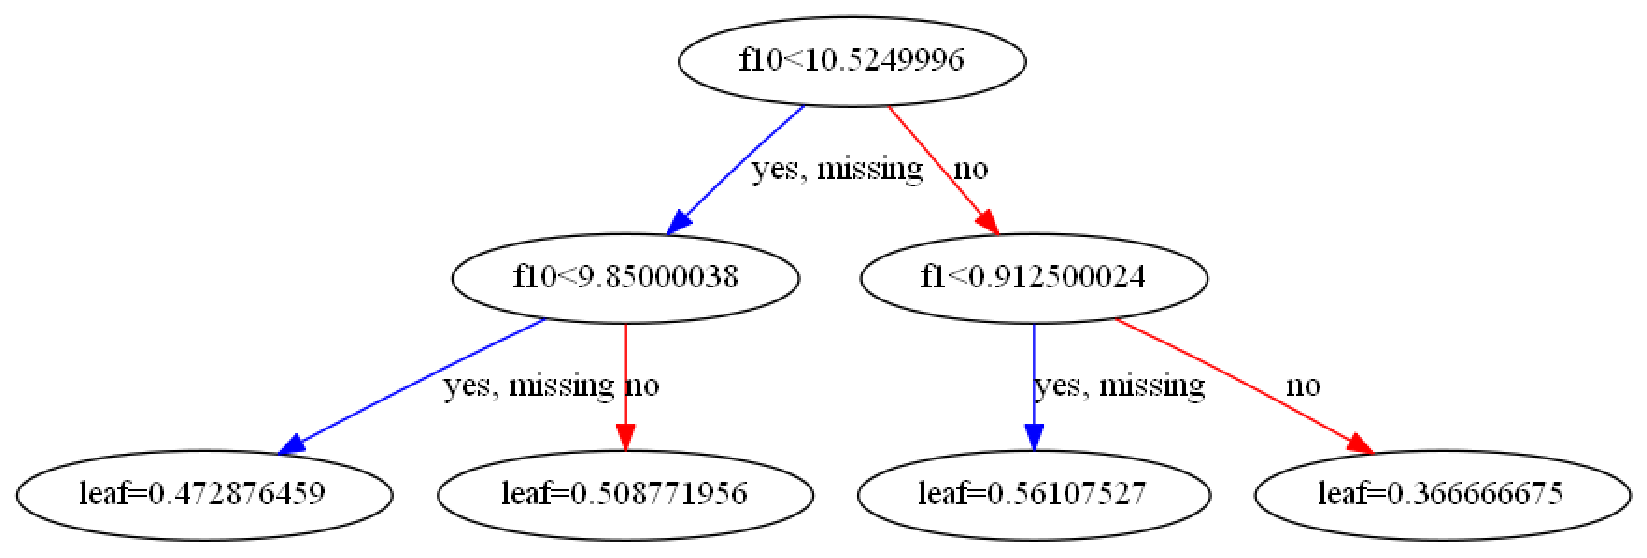

In [87]:
plt.rcParams['figure.figsize']=[50,10]
xgb.plot_tree(xg_reg,num_trees=0)

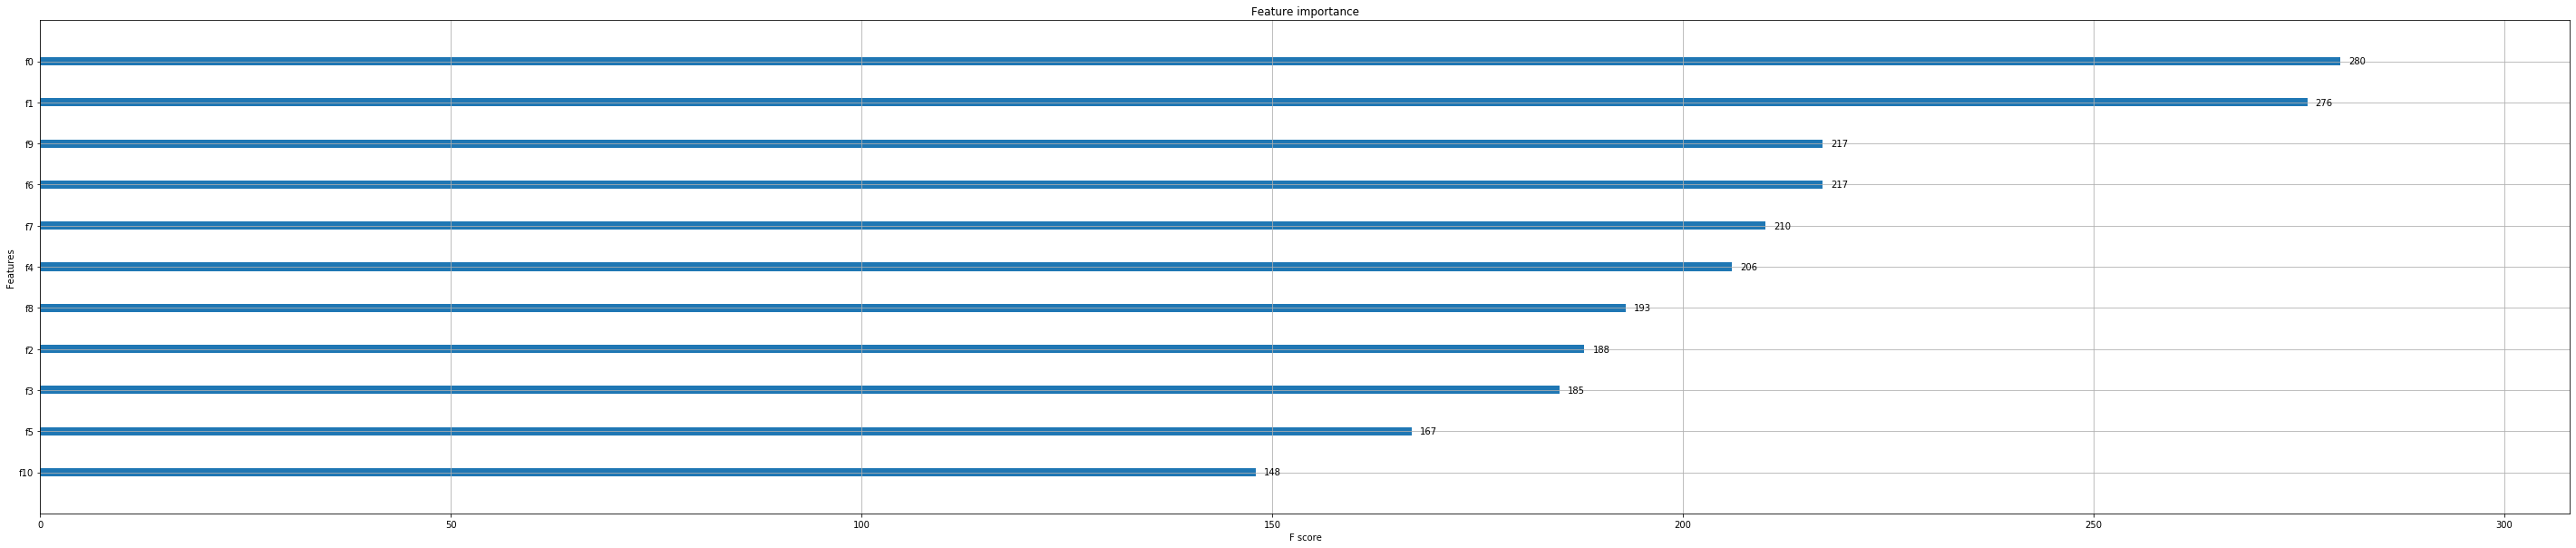

In [88]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize']=[80,60]
plt.show() #columnwise feature importance for this model